## Goodness of fit measures

Following the notebook that we ran in the class, in the current notebook we would like to show you ways to understand if the variables that you add in your model "matter" and how significant they are. 

In [29]:
# Import the necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  
import numpy as np
from sklearn import datasets, linear_model

We will use again the NYC dataset, with **minute** and **hour** as the variables of our model (a model already analyzed in the class)...

In [30]:
f=pd.read_csv("pickups_zone_1_15min.csv")

x=np.c_[np.ones(len(f)),f['hour'], f['minute']]
y= np.array(f['pickups'], ndmin=2).T

regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y);
print(regr.coef_)

[[  1.02632496e+02   1.09022384e+01   3.85391811e-02]]


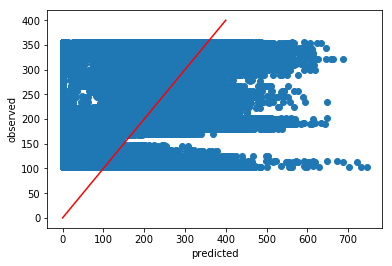

In [31]:
plt.scatter(y, regr.predict(x))
plt.xlabel("predicted")
plt.ylabel("observed")
plt.plot([0, 400], [0, 400], color="red")
plt.show()

As we have already noticed from the plot above, the chosen variables don't allow the formulation of a proper, accurate model. We should add more information in order to have better predictions.

The new model that we may choose to formulate should be compared with the current one, not only by observing a predictedVSobserved plot, but also by using the goodness-of-fit measures. They typically summarize the discrepancy between observed values and the values expected under the model in question. Their main categories are presented below:


* **Error measures in the estimation period:** root mean squared error, mean absolute error, mean absolute percentage error, mean absolute scaled error, mean error, mean percentage error
* **Error measures in the validation period** (if you have done out-of-sample testing)
* **Residual diagnostics and goodness-of-fit tests:** plots of actual and predicted values; plots of residuals versus time, versus predicted values, and versus other variables; residual autocorrelation plots, cross-correlation plots, and tests for normally distributed errors; measures of extreme or influential observations; tests for excessive runs, changes in mean, or changes in variance etc.

In the current notebook, we will focus on the first category.

If there is any one statistic that normally takes precedence over the others, it is the **root mean squared error (RMSE)**, which is the square root of the mean squared error. This is the statistic whose value is minimized during the parameter estimation process, and it is the statistic that determines the width of the confidence intervals for predictions.

$RMSE = \sqrt{\frac{\sum_{t=1}^{n}(\hat{y_{t}}-y_{t})^2}{n}} $

where $\hat{y_{t}}$ is the predicted or estimated value and $y_{t}$ is the regression's actual observation. Finally the n represents the number of non-missing data points.

The function that calculates the RMSE is:

In [32]:
def rmse(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true)**2))

In [33]:
rmse(regr.predict(x), y)

99.831371484958041

For a datum which ranges from 0 to 1000, an RMSE of 0.7 is small, but if the range goes from 0 to 1, it is not that small anymore. However, although the smaller the RMSE, the better, you can make theoretical claims on levels of the RMSE by knowing what is expected from your dependent variable in your field of research. Keep in mind that you can always normalize the RMSE.

The **mean absolute error (MAE)** is also measured in the same units as the data, and is usually similar in magnitude to, but slightly smaller than, the root mean squared error.  It is less sensitive to the occasional very large error because it does not square the errors in the calculation. It is the average vertical distance between each point and the Y=X line, which is also known as the One-to-One line.

$$ MAE = \frac{\sum_{t=1}^{n}\left |\hat{y_{t}}-y_{t}\right |}{n}$$

where $\hat{y_{t}}$ is the predicted or estimated value and $y_{t}$ is the regression's actual observations.

In [34]:
def mae(y_pred, y_true):
    return np.mean(np.abs(y_pred - y_true))

In [35]:
mae(regr.predict(x), y)

80.599425703467858

The **mean absolute percentage error (MAPE)** is also often useful for purposes of reporting, because it is expressed in generic percentage terms which will make some kind of sense even to someone who has no idea what constitutes a "big" error in terms of dollars spent or widgets sold. The MAPE can only be computed with respect to data that are guaranteed to be strictly positive, so if this statistic is missing from your output where you would normally expect to see it, it’s possible that it has been **suppressed due to negative data values**.

$$MAPE = \frac{100}{N}\times \sum_{t=1}^{n}\left |\frac{y_{t}-\hat{y_{t}}}{y_{t}} \right |$$

In [36]:
def mape(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [37]:
mape(regr.predict(x), y)

/Users/imarkou/anaconda/envs/py3env/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


inf

As you can see in our example, it cannot be used if there are zero values (which sometimes happens for example in demand data) because there would be a division by zero.

**R-squared** is the “percent of variance explained” by the model.  That is, R-squared is the fraction by which the variance of the errors is less than the variance of the dependent variable.  (The latter number would be the error variance for a constant-only model, which merely predicts that every observation will equal the sample mean.)  It is called R-squared because in a simple regression model it is just the square of the correlation between the dependent and independent variables, which is commonly denoted by “r”. 

If $\bar{y}$ is the mean of the observed data:

$$ \bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_i $$

then the variability of the data set can be measured using the following **sum of squares** formulas:

* The total sum of squares (proportional to the variable of the data):

$$ SS_{tot} = \sum_{i}^{ }(y_i-\bar{y})^2 $$

* The sum of squares of residuals, also called the residual sum of squares:

$$ SS_{res} = \sum_{i}^{ }(y_i-\hat{y})^2 $$

And the general definition of the coefficient of determination is:

$$ R^2 \equiv 1 - \frac{SS_{res}}{SS_{tot}} $$

An **R-squared** of 1 indicates that the regression line perfectly fits the data.

In [38]:
def r2(y_pred, y_true):
    return max(0, 1 - np.sum((y_true-y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))

In [39]:
r2(regr.predict(x), y)

0.36366501763760017

The use of an **adjusted R-squared** is an attempt to take account of the phenomenon of the **R-squared** automatically and spuriously increasing when extra explanatory variables are added to the model. It is a modification due to Henri Theil of **R-squared** that adjusts for the number of explanatory terms in a model relative to the number of data points. The **adjusted R-squared** can be negative, and its value will always be less than or equal to that of **R-squared**. 

$$\bar{R}^2 = R^2 - (1 - R^2)\frac{n-1}{n-p-1}$$

where $p$ is the total number of explanatory variables in the model (not including the constant term), and $n$ is the sample size.

In [40]:
def adjustedr2(y_pred, y_true, nvariables):
    r_squared = max(0, 1 - np.sum((y_true-y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
    return 1 - (1-r_squared)*(len(y_true)-1)/(len(y_true)-nvariables-1)

In [41]:
adjustedr2(regr.predict(x), y, 2)

0.36366017573471165

Last but not least, the **Pearson’s correlation coefficient** is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. 

The formula for $\rho$ is:

$$\rho_{X,Y} = \frac{cov(X,Y)}{\sigma _X\sigma _Y}$$

where:

* $cov$ is the covarianve
* $\sigma _{X}$ is the standard deviation of X
* $\sigma_Y$  is the standard deviation of Y

The Pearson’s correlation coefficient can be calculated using the **scipy** package:

In [42]:
from scipy.stats.stats import pearsonr

# It returns Pearson's correlation coefficient, 2-tailed p-value
rho2 = pearsonr(regr.predict(x), y)
print(rho2)

(array([ 0.60304645]), array([ 0.]))


or the **numpy** package:

In [43]:
y_pred = regr.predict(x)[:,0]
y_true = y[:,0]

In [44]:
np.corrcoef(y_pred,y_true)

array([[ 1.        ,  0.60304645],
       [ 0.60304645,  1.        ]])

So, now you can create a function that calculates all this goodness of fit measures, and reuse is as often as you want!

In [45]:
def compute_error(y_true, y_pred, nvariables = 2):
    corr = np.corrcoef(y_pred[:,0], y_true[:,0])[0,1]
    rho2 = pearsonr(y_pred, y_true)[0]
    mae = np.mean(np.abs(y_pred - y_true))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    rmse = np.sqrt(np.mean((y_pred - y_true)**2))
    r_squared = max(0, 1 - np.sum((y_true-y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
    adjustedr2 = 1 - (1-r_squared)*(len(y_true)-1)/(len(y_true)-nvariables-1)
    return  corr, rho2, mae, mape, rmse, r_squared, adjustedr2

In [46]:
corr, rho2, mae, mape, rmse, r_squared, adjustedr2 = compute_error(y, regr.predict(x))

print("Pearson’s correlation coefficient = ", rho2[0])
print("Mean Absolute Error = ", mae)
print("Mean Absolute Percentage Error = ", mape)
print("R-squared = ", r_squared)
print("Adjusted R-squared = ", adjustedr2)
print("Root Mean Squared Error = ", rmse)

Pearson’s correlation coefficient =  0.60304644733
Mean Absolute Error =  80.5994257035
Mean Absolute Percentage Error =  inf
R-squared =  0.363665017638
Adjusted R-squared =  0.363660175735
Root Mean Squared Error =  99.831371485


/Users/imarkou/anaconda/envs/py3env/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


Let's see how these values change by adding more information in our model (lags). We will use the same code from the class-notebook.

In [47]:
def buildLaggedFeatures(s,columns, lag=2,dropna=True):
    '''
    From http://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for c in s.columns:
            new_dict[c]=s[c]
        for col_name in columns:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

In [48]:
f_lagged=buildLaggedFeatures(f, ['pickups'], lag=2)
fllen=len(f_lagged)

In [49]:
x=np.c_[np.ones(len(f_lagged)),f_lagged['pickups_lag1'], f_lagged['pickups_lag2']]
y=np.array(f_lagged['pickups'], ndmin=2).T

In [50]:
regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y);

In [51]:
corr, rho2, mae, mape, rmse, r_squared, adjustedr2 = compute_error(y, regr.predict(x))

print("Pearson’s correlation coefficient = ", rho2[0])
print("Mean Absolute Error = ", mae)
print("Mean Absolute Percentage Error = ", mape)
print("R-squared = ", r_squared)
print("Adjusted R-squared = ", adjustedr2)
print("Root Mean Squared Error = ", rmse)

Pearson’s correlation coefficient =  0.976706509169
Mean Absolute Error =  20.390876784
Mean Absolute Percentage Error =  inf
R-squared =  0.953955605053
Adjusted R-squared =  0.953955254697
Root Mean Squared Error =  26.8541372189


/Users/imarkou/anaconda/envs/py3env/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


Waaaaay better! :-)